# Imports

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import gensim
from gensim.models import Word2Vec
import sklearn
from sklearn.neighbors import NearestNeighbors, KDTree
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statistics

%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
# Add DS_Project folder to your Drive and run this to access its files
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

# When loading files, their path will be something like:
# '/content/drive/My Drive/DS_Project/<file>'

In [ ]:
# Load a model
model = Word2Vec.load("/content/drive/My Drive/DS_Project/word2vec-dataset400k200dim1.model")

In [ ]:
# To load dataframe from pickled pandas object
df_w2v_100k = pd.read_pickle('/content/drive/My Drive/DS_Project/df_w2v_100k.pkl')
display(df_w2v_100k.head())

,rooms,area,description,price,distributionType
0,2,46.51,Objektbeschreibung: Die barrierefreie 2-Zimmer...,127000,buy
1,1,30,Toprenovierte Wohnung mit Fernblick direkte S...,37500,buy
2,2.5,81.24,Objektbeschreibung: Als freistehender Gebäudek...,317000,buy
3,3,86.01,Objektbeschreibung: Im Rahmen des Neubauprojek...,498000,buy
4,2.5,59.64,Als freistehender Gebäudekomplex liegen die be...,215900,buy


In [ ]:
# Save and load objects
import pickle
 
# SAVE
'''with open('/content/drive/My Drive/DS_Project/description_average200dim_10k.pkl', 'wb') as text_file:

  pickle.dump(description_average_embedding, text_file)
'''
# LOAD
with open('/content/drive/My Drive/DS_Project/description_text100k.pkl', 'rb') as text_file:
 
    description_text = pickle.load(text_file)
 
    # After text is read from file
    print(description_text)
    

0         [die, barrierefreie, zimmer, wohnung, mit, ein...
1         [toprenovierte, wohnung, mit, fernblick, direk...
2         [als, freistehender, gebäudekomplex, liegen, d...
3         [im, rahmen, des, neubauprojektes, quot, capel...
4         [als, freistehender, gebäudekomplex, liegen, d...
                                ...                        
107467    [hallo, br, br, biete, hier, eine, möblierte, ...
107468    [schicke, im, zentrum, von, marktredwitz, neu,...
107469    [schöne, stadtwohnung, auf, der, stock, br, zi...
107470    [diese, zimmer, etagenwohnung, befindet, sich,...
107471    [wir, bieten, hier, eine, ab, verfügbare, neuw...
Name: description, Length: 100000, dtype: object


# Load data

In [ ]:
!wget https://www.dropbox.com/s/1s801swyj9w00ko/uniqueListings.zip?dl=1

--2021-07-31 08:27:57--  https://www.dropbox.com/s/1s801swyj9w00ko/uniqueListings.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/1s801swyj9w00ko/uniqueListings.zip [following]
--2021-07-31 08:27:57--  https://www.dropbox.com/s/dl/1s801swyj9w00ko/uniqueListings.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf4bbc4dbdfd15587eecdbbb51a.dl.dropboxusercontent.com/cd/0/get/BTWtPsNH8BAKIk5X9aHmNppel3Gru97NE90h7nYDN03xbQ0tpU39f5AYuHCi9wycpiWULuX9xHM2rvPfXedHlbl1YjosiotPTob0we43KbvBBmYp6fRhxn5EWWM3z30SUgEJwTjulpPfAm4WcmS94nL8/file?dl=1# [following]
--2021-07-31 08:27:58--  https://ucf4bbc4dbdfd15587eecdbbb51a.dl.dropboxusercontent.com/cd/0/get/BTWtPsNH8BAKIk5X9aHmNppel3Gru97NE90h7nYDN03xbQ0tpU39f5AYuHCi9wycpiW

In [ ]:
!unzip uniqueListings.zip?dl=1

Archive:  uniqueListings.zip?dl=1
  inflating: uniqueListings.csv      


In [ ]:
!ls

 sample_data   uniqueListings.csv  'uniqueListings.zip?dl=1'


In [ ]:
df = pd.read_csv('uniqueListings.csv')

In [ ]:
df.head(3)

,_id,estateType,area,rooms,zip,commission,commissionPercentage,constructionYear,daysActive,description,estateTypeCode,estateTypeDetail,estateTypeDetailCode,firstSeen,firstTimeUse,imageCount,lastSeen,listingActive,location.isPublic,location.coordinates.type,location.coordinates.coordinates,location.zip,location.zipCity,location.city,location.state,location.county,price,title,distributionType,referencePrice.lowerSimpleStd,referencePrice.higherSimpleStd,referencePrice.lowerTwiceStd,referencePrice.higherTwiceStd,referencePrice.averagePricePerSqm,referencePrice.averagePriceTotal,referencePrice.livingAreaAvg,referencePrice.comparisonCount,referencePrice.radiusM,commissionTotal,descriptionLength,priceDeviation,platformCount,platformEbay,platformImmoscout,platformImmowelt,auction,collective,leasehold,lifehold,preservation
0,01b1241c-6be4-4afa-b3aa-66ba006f2858,apartment,46.51,2,51103,True,3.48,1995,226.052,Objektbeschreibung:\nDie barrierefreie 2-Zimme...,2,APARTMENT,118.0,2020-10-14T18:34:03.362Z,False,7,2021-05-28T19:49:09.549Z,False,False,Point,"[7.0501065,50.948383]",51103,51103 Köln,Köln Merheim,Nordrhein-Westfalen,Köln,127000,Servicewohnen für Senioren in Köln Höhenberg -...,buy,2900,4850,2250.0,6250.0,3750,174450,72,500,2700,4419.6,3973,-0.271998,2.0,True,True,False,False,False,False,False,False
1,7ded93f0-ed77-4fc8-9fa6-d330cee370d4,apartment,30,1,50667,False,NaN,1976,3.1969,Toprenovierte Wohnung mit Fernblick &#x2F;dire...,2,erdgeschosswohnung,117.0,2020-10-14T18:34:03.465Z,NaN,20,2020-10-17T23:17:35.845Z,False,False,Point,"[6.9538846,50.938644]",50667,50667 Köln,Köln Altstadt,Nordrhein-Westfalen,Köln,37500,Renovierte Ferienwohnung nahe Skihang&#x2F; na...,buy,3250,5250,2550.0,6700.0,4150,124050,82,500,1600,NaN,515,-0.697703,1.0,True,False,False,False,False,False,False,False
2,caf3d23b-44d4-42eb-90a0-6035d2151236,apartment,81.24,2.5,51105,False,NaN,1961,228.054,Objektbeschreibung:\nAls freistehender Gebäude...,2,etagenwohnung,118.0,2020-10-14T18:34:03.592Z,False,15,2021-05-30T19:52:28.134Z,True,True,Point,"[6.98784,50.92191]",51105,51105 Köln,Humboldt-Gremberg,Nordrhein-Westfalen,Köln,317000,"Jetzt Kapital anlegen in vermietete 2,5-Zimmer...",buy,2400,4950,1700.0,7100.0,3450,281300,84,500,2500,NaN,4402,0.126911,3.0,True,True,True,False,False,False,False,False


# Data exploration

In [ ]:
# DATASET ATTRIBUTES
df.columns.values

array(['_id', 'estateType', 'area', 'rooms', 'zip', 'commission',
       'commissionPercentage', 'constructionYear', 'daysActive',
       'description', 'estateTypeCode', 'estateTypeDetail',
       'estateTypeDetailCode', 'firstSeen', 'firstTimeUse', 'imageCount',
       'lastSeen', 'listingActive', 'location.isPublic',
       'location.coordinates.type', 'location.coordinates.coordinates',
       'location.zip', 'location.zipCity', 'location.city',
       'location.state', 'location.county', 'price', 'title',
       'distributionType', 'referencePrice.lowerSimpleStd',
       'referencePrice.higherSimpleStd', 'referencePrice.lowerTwiceStd',
       'referencePrice.higherTwiceStd',
       'referencePrice.averagePricePerSqm',
       'referencePrice.averagePriceTotal', 'referencePrice.livingAreaAvg',
       'referencePrice.comparisonCount', 'referencePrice.radiusM',
       'commissionTotal', 'descriptionLength', 'priceDeviation',
       'platformCount', 'platformEbay', 'platformImmoscout',

In [ ]:
# Dataset size: 2,693,876
df.shape

(2693876, 50)

In [ ]:
# Percentage of missing values
# Commision data is missing is most of the dataset
# Description missing on 22 % of the dataset
na_ratio = df.isna().sum().sort_values(ascending=False)/len(df)
na_ratio

commissionTotal                      0.892970
commissionPercentage                 0.892103
commission                           0.690752
constructionYear                     0.520824
firstTimeUse                         0.475869
priceDeviation                       0.283617
referencePrice.lowerTwiceStd         0.269339
referencePrice.lowerSimpleStd        0.269339
referencePrice.comparisonCount       0.269337
referencePrice.higherTwiceStd        0.269337
referencePrice.averagePricePerSqm    0.269337
referencePrice.livingAreaAvg         0.269337
referencePrice.averagePriceTotal     0.269337
referencePrice.radiusM               0.269337
referencePrice.higherSimpleStd       0.269337
estateTypeCode                       0.255119
estateTypeDetailCode                 0.230216
rooms                                0.223698
estateTypeDetail                     0.163205
area                                 0.110206
location.coordinates.coordinates     0.058087
location.coordinates.type         

In [ ]:
# Percentage of listing missing rooms OR area
df = df[['rooms', 'area']]
print(df.shape)
df = df[df.rooms.notnull()]
print(df.shape)
df = df[df.area.notnull()]
print(df.shape)
print('Percentage of rows missing rooms OR area: 22.5%')

(2086819, 2)
(2086819, 2)
(2086819, 2)
Percentage of rows missing rooms OR area: 22.5%


In [ ]:
# Variable types
print(df.info())

# Basic statistical info about the variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693876 entries, 0 to 2693875
Data columns (total 50 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   _id                                object 
 1   estateType                         object 
 2   area                               object 
 3   rooms                              object 
 4   zip                                object 
 5   commission                         object 
 6   commissionPercentage               object 
 7   constructionYear                   object 
 8   daysActive                         object 
 9   description                        object 
 10  estateTypeCode                     object 
 11  estateTypeDetail                   object 
 12  estateTypeDetailCode               float64
 13  firstSeen                          object 
 14  firstTimeUse                       object 
 15  imageCount                         object 
 16  lastSeen          

,estateTypeDetailCode,referencePrice.lowerTwiceStd,referencePrice.higherTwiceStd,platformCount
count,2.073702e+06,1.968309e+06,1.968315e+06,2.693770e+06
mean,7.274015e+01,3.003464e+04,1.506006e+05,1.249052e+00
std,7.663157e+01,7.618280e+04,3.772961e+05,5.496157e-01
min,0.000000e+00,2.200000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,5.100000e+00,1.040000e+01,1.000000e+00
50%,1.170000e+02,7.300000e+00,1.570000e+01,1.000000e+00
75%,1.180000e+02,1.600000e+03,5.550000e+03,1.000000e+00
max,4.413500e+04,1.671000e+06,1.144400e+07,3.000000e+00


# Get rooms & area from descriptions

In [ ]:
# Pick relevant columns
sample_df = df[['price', 'area', 'rooms', 'distributionType', 'description', 'referencePrice.averagePriceTotal']]

# Delete full dataset variable for memory reasons
%reset_selective -f "^df$"

In [ ]:
# Keep full rows only
def remove_nans(df):
  df = df[df.rooms.notnull()]
  df = df[df.price.notnull()]
  df = df[df.area.notnull()]
  df = df[df.description.notnull()]
  df = df[df.distributionType.notnull()]
  df = df[df['referencePrice.averagePriceTotal'].notnull()]
  return df

sample_df = remove_nans(sample_df)

# Eliminate \r, \n, &#x2F; and replace multiple blank spaces for single space
sample_df['description'] = sample_df['description'].str.replace('\r',' ')
sample_df['description'] = sample_df['description'].str.replace('\n',' ')
sample_df['description'] = sample_df['description'].str.replace('&#x2F;',' ')
sample_df['description'] = sample_df['description'].str.replace('\s+',' ', regex=True)

# Sample size: 1,890,524
print(sample_df.shape)

In [ ]:
# Subsample dataset to make it manageable with RAM (shuffled)
sample_df = sample_df.sample(frac=0.25) # Instead of this line, load "df_w2v_100k" (see word2vec section to load it)
print(sample_df.shape)

(673469, 6)


In [ ]:
# Split: 70% train, 30% test
train_df, test_df = np.split(sample_df, [int(.7*len(sample_df))])

In [ ]:
# Show full description
pd.set_option('display.max_colwidth', None)
train_df.head(5)
# Descriptions are long but sometimes not too specific (e.g. "can have 1, 3, or 4 rooms")

**Manual pattern analysis**

In [ ]:
import re
import math
from numpy import mean


def exctract_feature_manually(words, description, chars, typeF):
  candidates = []

  if type(description) == float:
    return math.nan

  if typeF == 'rooms':
    hb = 40
    lb = 0
    naive = naive_approach(description)
    if naive != -1:
      return naive
  elif typeF == 'area':
    hb = 350
    lb = 15

  for word in words:
    indices = [m.start() for m in re.finditer(word, description, re.IGNORECASE)]
    # Search for digits in the previous chars characters
    for index in indices:
      if (index == -1):
        slice_txt = ""
      elif (index >= chars):
        slice_txt = description[(index - chars):index]
      else:
        slice_txt = description[0:index]
      slice_txt = slice_txt.replace(",", ".") # for numbers with commas
      candidates.extend(re.findall(r"[-+]?\d*\.\d+|\d+", slice_txt))
  candidates = [float(x) for x in candidates if x != []]
  candidates = [x for x in candidates if x <= hb] # high bound
  candidates = [x for x in candidates if x >= lb] # low bound
  #print(candidates)
  try:
    extracted_value = first(candidates) # mean, max, min, first, last, most_frequent, least_frequent
  except (ValueError, TypeError):
    extracted_value = math.nan

  return extracted_value

def first(list):
  return next(iter(list), math.nan)

def most_frequent(list):
  return max(set(list), key = list.count)

def least_frequent(list):
  return min(set(list), key = list.count)

def evaluate_extracted_values(rooms, area, e_rooms, e_area):
  dif_rooms = e_rooms - rooms
  dif_area = e_area - area
  # print('\n\nObject %i:' %index)
  # print('Error for rooms:', dif_rooms)
  # print('Error for area:', dif_area)
  return dif_rooms, dif_area

In [ ]:
words_for_room = ['Zi', 'room'] # 'Zim' is enough, only few words starting with 'Zim' other than 'Zimmer'
words_for_area = ['m^2 ', 'qm ', 'm² ', 'Quadrat', 'square', 'm2'] # spaces are extremely important!

error_rooms = []
error_area = []
rooms_fails = 0
area_fails = 0
rooms_success = 0
area_success = 0
num_objects = 100000
counter = 0
fail_indices = []

for index, row in train_df.iterrows():
  current_txt = row['description']
  rooms = float(row['rooms'])
  area = float(row['area'])
  flag_fail = False

  counter += 1

  extracted_rooms = exctract_feature_manually(words_for_room, current_txt, 11, 'rooms')
  extracted_area = exctract_feature_manually(words_for_area, current_txt, 8, 'area')
  e1, e2 = evaluate_extracted_values(rooms, area, extracted_rooms, extracted_area)
  if math.isnan(e1):
    rooms_fails += 1
    flag_fail = True
  else:
    if e1 == 0:
      rooms_success += 1
    else:
      error_rooms.append(e1)
      #print('\n\n-----------------------------------')
      #print('Real')
      #print(rooms)
      #print('Guess')
      #print(extracted_rooms)
      #print('Text')
      #print(current_txt)
  if math.isnan(e2):
    area_fails += 1
    flag_fail = True
  else:
    if e2 == 0:
      area_success += 1
    else:
      error_area.append(e2)

  if flag_fail:
    fail_indices.append(index)

  if counter >= num_objects - 1:
    break

#print(error_rooms)
print('Mean error in the rooms:', mean(error_rooms))
print('Number of fails with rooms: {}, which is a fail rate of {}'.format(rooms_fails, (rooms_fails/num_objects)))
print('Number of successes with rooms: {}, which is a success rate of {} \n\n'.format(rooms_success, (rooms_success/num_objects)))
print('Mean error in the area:', mean(error_area))
print('Number of fails with area: {}, which is a fail rate of {}'.format(area_fails, (area_fails/num_objects)))
print('Number of successes with rooms: {}, which is a success rate of {} \n\n'.format(area_success, (area_success/num_objects)))
print('The rest is the false prediction rate')

Mean error in the rooms: -6546.469310774817
Number of fails with rooms: 56334, which is a fail rate of 0.56334
Number of successes with rooms: 28384, which is a success rate of 0.28384 


Mean error in the area: -89.94229864925042
Number of fails with area: 70755, which is a fail rate of 0.70755
Number of successes with rooms: 15770, which is a success rate of 0.1577 


The rest is the false prediction rate


In [ ]:
def naive_approach(txt):
  if re.search('ein.zimmer.w', txt, re.IGNORECASE) or re.search('1.zimmer.w', txt, re.IGNORECASE):
    return(1.0)
  elif re.search('zwei.zimmer', txt, re.IGNORECASE) or re.search('2.zimmer', txt, re.IGNORECASE):
    return(2.0)
  elif re.search('drei.zimmer', txt, re.IGNORECASE) or re.search('3.zimmer', txt, re.IGNORECASE):
    return(3.0)
  elif re.search('vier.zimmer', txt, re.IGNORECASE) or re.search('4.zimmer', txt, re.IGNORECASE):
    return(4.0)
  elif re.search('1[\.,]5.zimmer', txt, re.IGNORECASE):
    return(1.5)
  elif re.search('2[\.,]5.zimmer', txt, re.IGNORECASE):
    return(2.5)
  elif re.search('3[\.,]5.zimmer', txt, re.IGNORECASE):
    return(3.5)
  elif re.search('4[\.,]5.zimmer', txt, re.IGNORECASE):
    return(4.5)
  elif re.search(' fünf.zimmer', txt, re.IGNORECASE) or re.search(' 5.zimmer', txt, re.IGNORECASE):
    return(5.0)
  elif re.search('sechs.zimmer', txt, re.IGNORECASE) or re.search('6.zimmer', txt, re.IGNORECASE):
    return(6.0)
  elif re.search('sieben.zimmer', txt, re.IGNORECASE) or re.search('7.zimmer', txt, re.IGNORECASE):
    return(7.0)
  elif re.search('acht.zimmer', txt, re.IGNORECASE) or re.search('8.zimmer', txt, re.IGNORECASE):
    return(8.0)
  else: 
    return(-1)

In [ ]:
txt = 'Objektbeschreibung: Dieser Resthof, Baujahr 1910, besitzt eine Grundstücksgröße von 42.300m². Aufgeteilt sind diese in Hoffläche (5.300m²), Hausweide (14.000m²) und Pferdeweide (23.000m²). Die Flächen wurden bisher zur Pferde- und Alpakahaltung genutzt. Ein kleiner Stall mit 4 Boxen sowie ein Unterstand befinden sich auf der Hoffläche.Das Wohnhaus mit einer Wohnfläche von 320m² wurde seit 2006 fortlaufend renoviert. Das Haus wird mit einer Gasheizung mit einem Tank von 2013 befeuert. Eine zusätzliche Heizmöglichkeit bieten die zwei Kaminöfen. Das Satteldach ist mit einem Trapezblech ausgestattet und isoliert. Es wurde das Erdgeschoss, das Obergeschoss als auch das Dachgeschoss ausgebaut. Die 13 Zimmer bieten viel Platz für Familienmitglieder. Es wurden bereits zwei neue Bäder fertiggestellt und zwei weitere befinden sich in der Vorbereitung. Außerdem befinden sich zwei neuwertige Einbauküchen innerhalb des Wohngebäudes.Der Hof verfügt über einen Brunnen mit eigener Frischwasseraufbereitung und über eine moderne 3 Kammer-Kläranlage.Es sind 3 Autostellplätze und eine Garage mit Lagerraum vorhanden. Die Terrasse mit Blick auf die Hausweide und den Stall lädt zum Entspannen ein.Unter dem Link https:&#x2F;&#x2F;tour.ogulo.com&#x2F;NDAf ist ein virtueller Rundgang abrufbar.Ausstattung:- fortlaufende Renovierung seit 2006- 13 Zimmer'

test = exctract_feature_manually(words_for_room, txt, 11, 'rooms')
#test = naive_approach(txt)
print(test)

[13.0, 13.0]
13.0



# Create word2vec model

In [ ]:
# Pick relevant columns
sample_df_w2v = df[['rooms', 'area', 'description', 'price', 'distributionType']]

# Delete full dataset variable for memory reasons
%reset_selective -f "^df$"


In [ ]:
# Keep full rows only
def remove_nans_description(df):
  df = df[df.rooms.notnull()]
  df = df[df.price.notnull()]
  df = df[df.area.notnull()]
  df = df[df.description.notnull()]
  df = df[df.distributionType.notnull()]
  return df

sample_df_w2v = remove_nans_description(sample_df_w2v)
print(sample_df_w2v.shape)

(2039210, 5)


In [ ]:
# Subsample dataset to make it manageable with RAM - 2632714 is the total size
sample_df_w2v = sample_df_w2v.head(100000)
print(sample_df_w2v.shape)

(100000, 5)


In [ ]:
# Eliminate \r, \n, &#x2F; and replace multiple blank spaces for single space
sample_df_w2v['description'] = sample_df_w2v['description'].str.replace('\r',' ')
sample_df_w2v['description'] = sample_df_w2v['description'].str.replace('\n',' ')
sample_df_w2v['description'] = sample_df_w2v['description'].str.replace('&#x2F;',' ')
sample_df_w2v['description'] = sample_df_w2v['description'].str.replace('<br />',' ')
# sample_df_w2v['description'] = sample_df_w2v['description'].str.replace('\s+',' ', regex=True)

df_w2v_100k = df_w2v_100k.reset_index(drop=True) # reset indices

In [ ]:
# Preprocess text with standard nlp pipeline
description_text = sample_df_w2v.description.apply(gensim.utils.simple_preprocess)
print(description_text)

0         [die, barrierefreie, zimmer, wohnung, mit, ein...
1         [toprenovierte, wohnung, mit, fernblick, direk...
2         [als, freistehender, gebäudekomplex, liegen, d...
3         [im, rahmen, des, neubauprojektes, quot, capel...
4         [als, freistehender, gebäudekomplex, liegen, d...
                                ...                        
107467    [hallo, br, br, biete, hier, eine, möblierte, ...
107468    [schicke, im, zentrum, von, marktredwitz, neu,...
107469    [schöne, stadtwohnung, auf, der, stock, br, zi...
107470    [diese, zimmer, etagenwohnung, befindet, sich,...
107471    [wir, bieten, hier, eine, ab, verfügbare, neuw...
Name: description, Length: 100000, dtype: object


In [ ]:
# Delete dataset variable for memory reasons
%reset_selective -f "^sample_df_w2v$"

In [ ]:
# Set up model
model = gensim.models.Word2Vec(
    size=200,
    window=10,
    min_count=1,
    workers=4,
)

In [ ]:
# Build vocabulary (numbers are not kept)
vocab = model.build_vocab(description_text, progress_per=1000)

In [ ]:
# Train model
print('Epochs: ', model.epochs)
model.train(description_text, total_examples=model.corpus_count, epochs=model.epochs)

model.save("./word2vec-dataset.model")

Epochs:  5


In [ ]:
# Sanity check
display(model.wv.most_similar("balkon"))

[('südbalkon', 0.8762030601501465),
 ('westbalkon', 0.8053118586540222),
 ('sonnenbalkon', 0.7931610345840454),
 ('südwestbalkon', 0.7526512145996094),
 ('loggia', 0.7158631086349487),
 ('eckbalkon', 0.6755017042160034),
 ('ostbalkon', 0.6675866842269897),
 ('balkone', 0.5974686145782471),
 ('dachterrasse', 0.5764081478118896),
 ('ostgarten', 0.5627032518386841)]

In [ ]:
print(model.wv.vocab["haus"])

Vocab(count:209672, index:41, sample_int:3811165207)


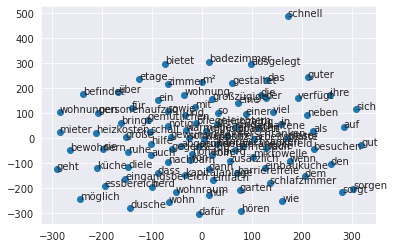

In [ ]:
# Visualize tSNE of words

#vocab = list(model.wv.key_to_index)
vocab = list(model.wv.vocab)
vocab = vocab[:100] # only take 100 words for simplicity of plot
X = model.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df_tsne['x'], df_tsne['y'])
for word, pos in df_tsne.iterrows():
    ax.annotate(word, pos)


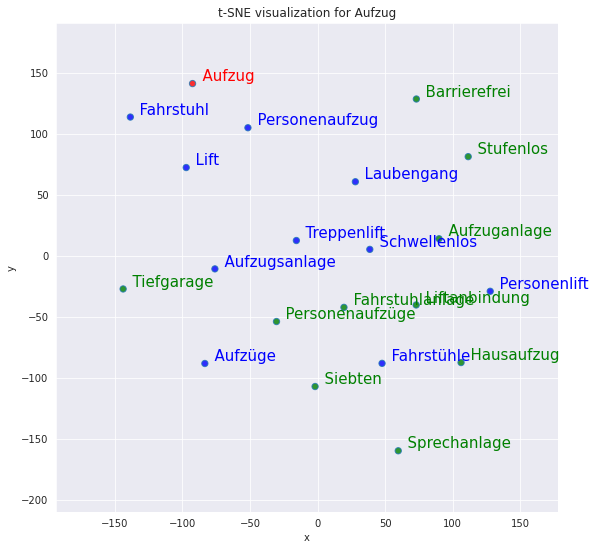

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 200), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

tsnescatterplot(model, 'aufzug',[t[0] for t in model.wv.most_similar(positive=["aufzug"], topn=20)][10:])

In [ ]:
# We can only train word2vec on a subsample of the dataset due to limited RAM

# Load pretrained German w2v model (https://github.com/devmount/GermanWordEmbeddings) - NOT WORKING
model = gensim.models.KeyedVectors.load_word2vec_format("german.model", binary=True)

**Get average of word2vec embeddings for each description**

In [ ]:
# Calculate vectors for descriptions (10k descriptions to make it manageable)

#print(len(max(description_text[:10000], key=len)))
#description_embeddings = np.empty((200, 10000, 1399))
#description_embeddings.fill(np.nan)
description_average_embedding = np.empty((200, 10000))

for idx, description in enumerate(description_text[:10000]):
  count = np.zeros((1,200))
  for i, word in enumerate(description):
    count = count + model.wv[word]
  description_average_embedding[:,idx] = count/i
print(i, idx, description_average_embedding.shape)

38 9999 (200, 10000)


In [ ]:
print(description_average_embedding[:,0])

[-0.34280895 -0.16509704 -0.56132479  1.03415671  0.1646606  -0.92724887
 -0.40632892  0.3259586  -0.31776326 -0.61240916 -0.89602232 -0.01091492
  1.05038397  0.98656238  0.0928116  -0.13930002  1.15245499  0.73098223
 -0.41941873 -0.81583023 -0.57669604  0.09908156 -0.17807939  0.6664497
 -0.59196935 -0.21231973 -0.23908021 -0.69293984  0.46776575 -0.12937125
  0.48094355 -0.48349403 -0.95611912  0.01417356 -0.54709173 -0.40764861
  0.15871687  0.53774794 -0.18289096  0.31883252 -0.12130479  0.37688967
  0.24326115  0.44270382  0.53689019  0.17542687  0.08197587 -0.58308349
  0.62203561  1.64874999 -0.61852287 -0.02101302  0.70473979 -0.8735494
 -0.21720038  0.57709236  0.15369949  0.22616033  0.53317635  1.02963256
 -0.41577132  0.80002409 -0.87607051  0.38690346  0.05372488  0.77866341
  0.17512158 -0.02507188 -0.15442375  0.60707994 -0.18267565 -0.02733165
 -0.04879656  0.17458416  0.16817902 -0.12410663 -0.27388343  0.1913971
 -0.2084265  -0.17438594 -0.23688613 -0.15417657 -0.05

# Generate new attributes

In [ ]:
# Add custom column to find out other characteristics of the property
# (park, glasfaser, garage, loggia, balkon, bus, lan, supermarkt, schwimmbad, universität, fahrstuhl, pv, fitnessstudio)

def find_syns_in_description(inputWord, numSyns):
  # inputWord: word to which the function will seek synonyms and most similar words
  # numSyns: how many of the top similar words will be checked for occurrence in the description (up to 10)

  similarityList = model.wv.most_similar(inputWord)[:numSyns] # Top 5, could also set a threshold
  synonyms = [item[0] for item in similarityList]
  synonyms.append(inputWord)
  wordAppears = list()
  for idx, description in enumerate(description_text[:10000]):
    isSynInDescription = [word in description for word in synonyms]
    if True in isSynInDescription:
      wordAppears.append(True)
    else:
      wordAppears.append(False)
  return wordAppears

appearsInDescription = find_syns_in_description("pv", 5)

display(model.wv.most_similar("pv"))
print('\n\nHas the property this feature?', appearsInDescription)
print('\n\nPercentage of properties with this characteristic:', sum(appearsInDescription)/len(appearsInDescription)*100, '%')

[('photovoltaik', 0.9003180861473083),
 ('kwp', 0.7747093439102173),
 ('fotovoltaik', 0.7626659870147705),
 ('solarthermische', 0.7226443290710449),
 ('solarthermie', 0.6556092500686646),
 ('voltaik', 0.6451516151428223),
 ('einspeisung', 0.6305899620056152),
 ('solar', 0.5769022703170776),
 ('solaranlage', 0.5646766424179077),
 ('kw', 0.5633199214935303)]



Has the property this feature? [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

# Find most similar properties to query

Average length of descriptions: 208.73138
Standard deviation of length of descriptions: 178.8998958496705
Descriptions longer than average:  40.935 %
Descriptions shorter than average:  59.065 %


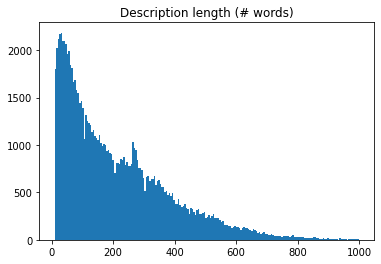

In [ ]:
# Description length hist (from a subsample of 100k descriptions)

description_lens = [len(i) for i in description_text]
avg_length = sum(description_lens)/len(description_text)
print('Average length of descriptions:', avg_length)
print('Standard deviation of length of descriptions:', statistics.stdev(description_lens))
longer_descriptions = [element for element in description_lens if element > avg_length]
print('Descriptions longer than average: ', len(longer_descriptions)/len(description_text)*100, '%')
print('Descriptions shorter than average: ', (1 - len(longer_descriptions)/len(description_text))*100, '%')

plt.hist(description_lens, bins=200, range=(10, 1000))
plt.title('Description length (# words)')
_ = plt.show()


In [ ]:

# Find properties with most similar description vector
def find_similar_properties(property_index, num_neighbors):
  # property_index: property position in the array "description_average" and dataframe "df_w2v_100k"
  # num_neighbors: number of closest properties to find

  # Use KD tree to look up neighbors
  tree = KDTree(description_average.T, leaf_size=2, metric='infinity') # cosine similarity, works better than euclidean
  queryPoint = description_average[:,property_index:property_index+1].T
  #print(queryPoint.shape, description_average.shape)             
  dist, ind = tree.query(queryPoint, k=num_neighbors+1)
  return dist, ind

######
neighbors_dist, neighbors_ind = find_similar_properties(27, 5)
print('Distance: ', neighbors_dist, '\nIndices of neighbors: ', neighbors_ind)
######

# Plot distance
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#labels = list(map(str, neighbors_ind[0]))
#ax.bar(labels[1:], neighbors_dist[0][1:])
#ax.set_title('Euclidean distance of property %s to neighbors' %labels[0])
#plt.show()

pd.set_option('display.max_colwidth', None)
display(df_w2v_100k.loc[ neighbors_ind[0] ])

Distance:  [[0.         0.50229175 0.51858243 0.55016354 0.55075029 0.56614054]] 
Indices of neighbors:  [[  27 2014 1448 1603 6858 1682]]


rooms area  ...   price distributionType
27       3   76  ...  225000              buy
2014     3   75  ...  199500              buy
1448     3   74  ...  179000              buy
1603     3  100  ...  480000              buy
6858     8  350  ...  495000              buy
1682     2   40  ...  216000              buy

[6 rows x 5 columns]

# Predict area/rooms from description vector (TODO)

In [ ]:
# Random forest to predict from description vector vs predict from existing other features plus vector


In [ ]:
ex_dataframe = df_w2v_100k.loc[[10]]
ex_dataframe['ConstructionYear'] = 1985

pd.set_option('display.max_colwidth', 10)
ex_dataframe_post = df_w2v_100k.loc[[10]]
ex_dataframe_post['ConstructionYear'] = 1985
ex_dataframe_post['Terrasse'] = True
ex_dataframe_post['Parkett'] = False
ex_dataframe_post['Garten'] = True
ex_dataframe_post['Park'] = False
ex_dataframe_post['Aufzug'] = True
ex_dataframe_post['Glasfaser'] = False
ex_dataframe_post['Garage'] = True
ex_dataframe_post['PV'] = False
ex_dataframe_post['Schwimmbad'] = True

print(ex_dataframe['description'])
display(ex_dataframe)
display(ex_dataframe_post)

10    Objekt...
Name: description, dtype: object


,rooms,area,description,price,distributionType,ConstructionYear
10,1,38.27,Objekt...,238000,buy,1985


,rooms,area,description,price,distributionType,ConstructionYear,Terrasse,Parkett,Garten,Park,Aufzug,Glasfaser,Garage,PV,Schwimmbad
10,1,38.27,Objekt...,238000,buy,1985,True,False,True,False,True,False,True,False,True
